# RAT 7.3

We have seasonal quarterly financial data from Johnson and Johnson 1960-1981 in `data/jj.txt`.  

1) Plot the time series data.  

In [ ]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/jj.txt')
df.head()

In [3]:
dates = pd.date_range('1960','1981', freq='Q')
df['dates'] = dates
df['quarters'] = pd.DatetimeIndex(df['dates']).quarter
df=df.set_index('dates')
df.head()

,earnings,quarters
dates,,
1960-03-31,0.71,1
1960-06-30,0.63,2
1960-09-30,0.85,3
1960-12-31,0.44,4
1961-03-31,0.61,1


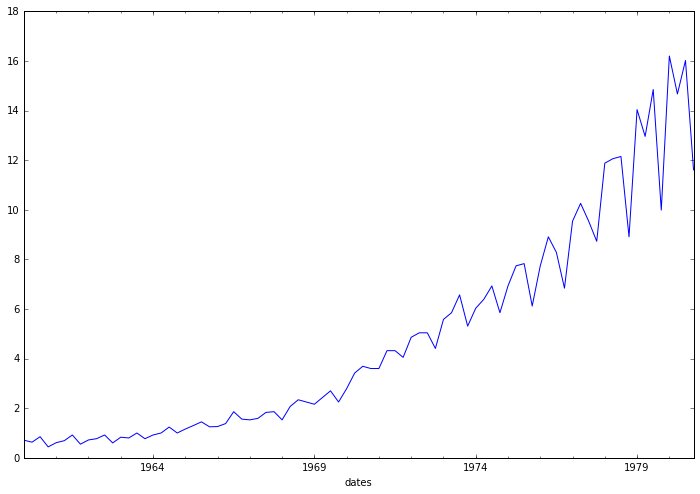

In [4]:
ts = pd.Series(df['earnings'])
ts.plot(figsize=(12,8));

2) What do you see in the plot? (Trend, seasonality...)  

There's an upward trend and a seasonal pattern.

3) Modify the data to make it approximately stationary.  

In [16]:
def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

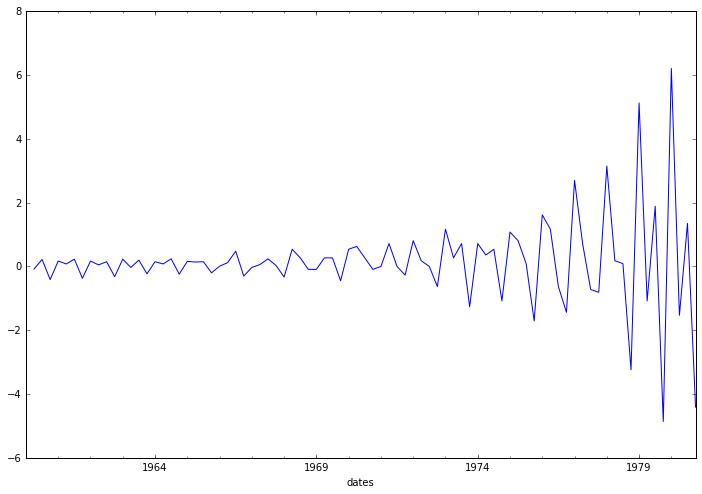

In [5]:
ts.diff(1).plot(figsize=(12,8));

In [12]:
# sm.graphics.tsa.plot_acf(ts, lags=16)
# sm.graphics.tsa.plot_pacf(ts, lags=16);

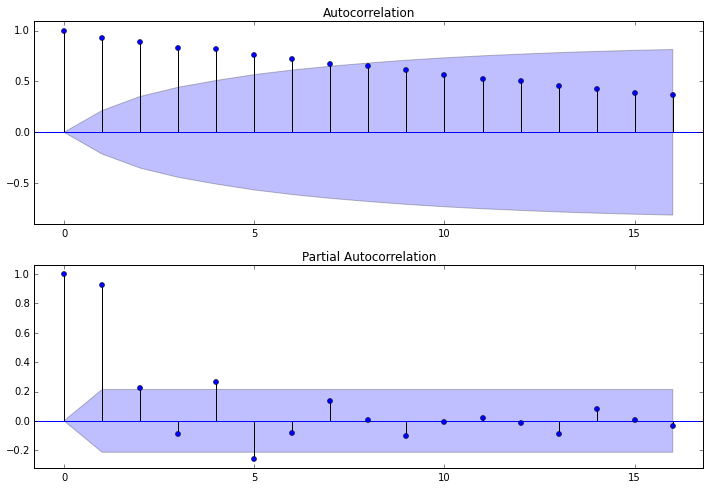

In [8]:
acf_pacf(ts,16)

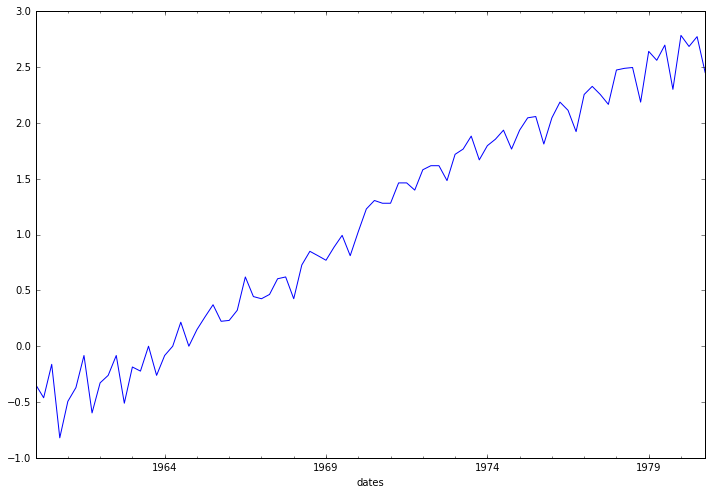

In [13]:
ts = pd.Series(np.log(df['earnings']))
ts.plot(figsize=(12,8));

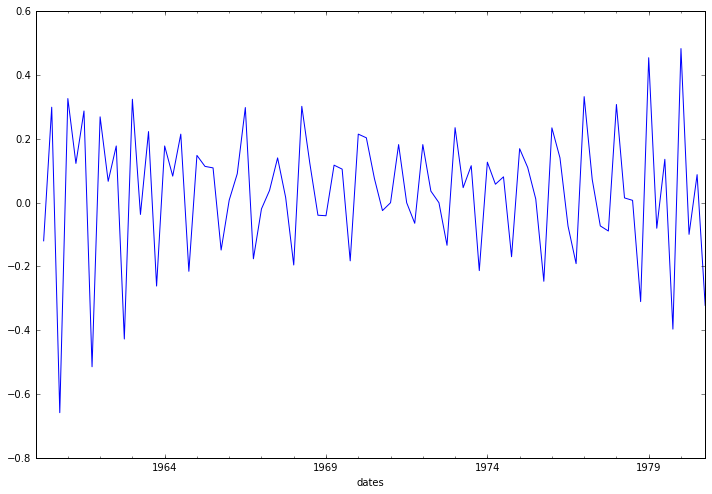

In [14]:
ts_diff=ts.diff(1)
ts_diff.plot(figsize=(12,8));

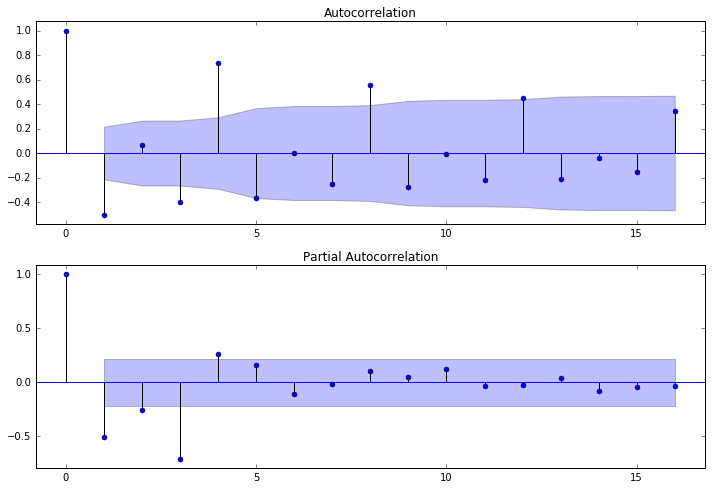

In [17]:
acf_pacf(ts_diff[1:],16)

In [23]:
pd.concat((df.earnings, ts, ts_diff, ts_sdiff), axis=1)

,earnings,earnings,earnings,earnings
dates,,,,
1960-03-31,0.710000,-0.342490,NaN,NaN
1960-06-30,0.630000,-0.462035,-0.119545,NaN
1960-09-30,0.850000,-0.162519,0.299517,NaN
1960-12-31,0.440000,-0.820981,-0.658462,NaN
1961-03-31,0.610000,-0.494296,0.326684,NaN
1961-06-30,0.690000,-0.371064,0.123233,0.242778
1961-09-30,0.920000,-0.083382,0.287682,-0.011834
1961-12-31,0.550000,-0.597837,-0.514455,0.144006
1962-03-31,0.720000,-0.328504,0.269333,-0.057351


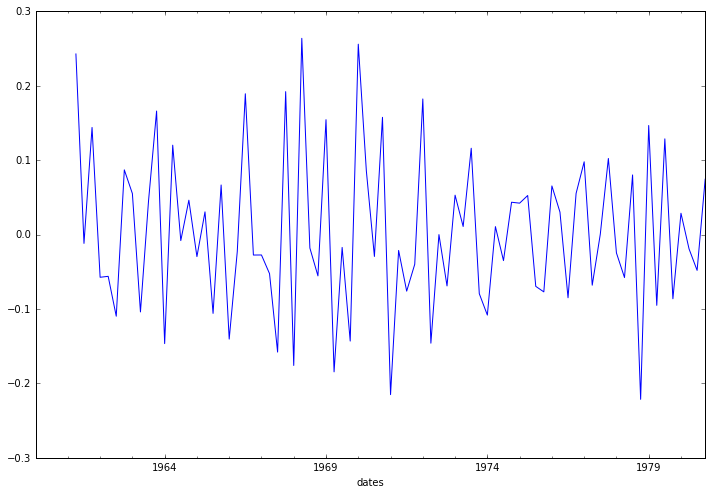

In [18]:
ts_sdiff = ts_diff.diff(4)
ts_sdiff.plot(figsize=(12,8));

4) Plot the ACF and PACF of the modified data.

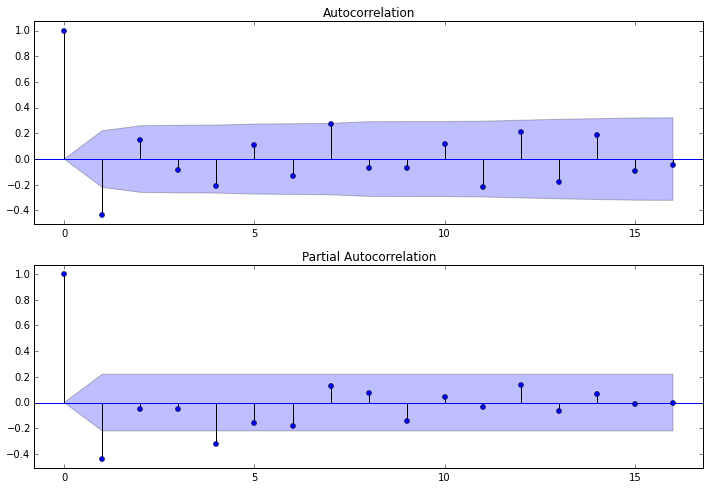

In [15]:
acf_pacf(ts_sdiff[5:], 16)